## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import requests


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
# def label_hood (row):
#     try:
#         url = "https://api.mapbox.com/geocoding/v5/mapbox.places/{},{}.json?types=neighborhood&access_token=pk.eyJ1IjoicHBhcmtpbnNvbiIsImEiOiJjbGJ6cDR3eW8xMndtM3BwajU5ZGIwbjd3In0.krj0bzOrWhxQiEHZ2w5-IQ".format(df['long'], df['lat'])
#         response = requests.get(url)
#         return response.json()['features'][0]['text']
#     except (ValueError, TypeError):
#         continue
    
# df['neighborhood'] = df.apply(lambda row: label_hood(row), axis=1)

In [6]:
df['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [7]:
df['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [8]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [9]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64

In [10]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [11]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [12]:
df['heat_source'].nunique()

7

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [15]:
#********************PRICE FILTER**********************
# df = df[df['price'] < 2000000]
# df = df[df['sqft_living'] < 4000]

In [16]:
df_num = df.select_dtypes(include=np.number).drop('id', axis=1)

In [17]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30111 non-null  float64
 1   bedrooms       30111 non-null  int64  
 2   bathrooms      30111 non-null  float64
 3   sqft_living    30111 non-null  int64  
 4   sqft_lot       30111 non-null  int64  
 5   floors         30111 non-null  float64
 6   sqft_above     30111 non-null  int64  
 7   sqft_basement  30111 non-null  int64  
 8   sqft_garage    30111 non-null  int64  
 9   sqft_patio     30111 non-null  int64  
 10  yr_built       30111 non-null  int64  
 11  yr_renovated   30111 non-null  int64  
 12  lat            30111 non-null  float64
 13  long           30111 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 3.4 MB


In [18]:
y = df_num['price']
X = df_num.drop(['lat','price', 'long'], axis=1)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       30111 non-null  int64  
 1   bathrooms      30111 non-null  float64
 2   sqft_living    30111 non-null  int64  
 3   sqft_lot       30111 non-null  int64  
 4   floors         30111 non-null  float64
 5   sqft_above     30111 non-null  int64  
 6   sqft_basement  30111 non-null  int64  
 7   sqft_garage    30111 non-null  int64  
 8   sqft_patio     30111 non-null  int64  
 9   yr_built       30111 non-null  int64  
 10  yr_renovated   30111 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.8 MB


<bound method Figure.tight_layout of <Figure size 1080x1080 with 16 Axes>>

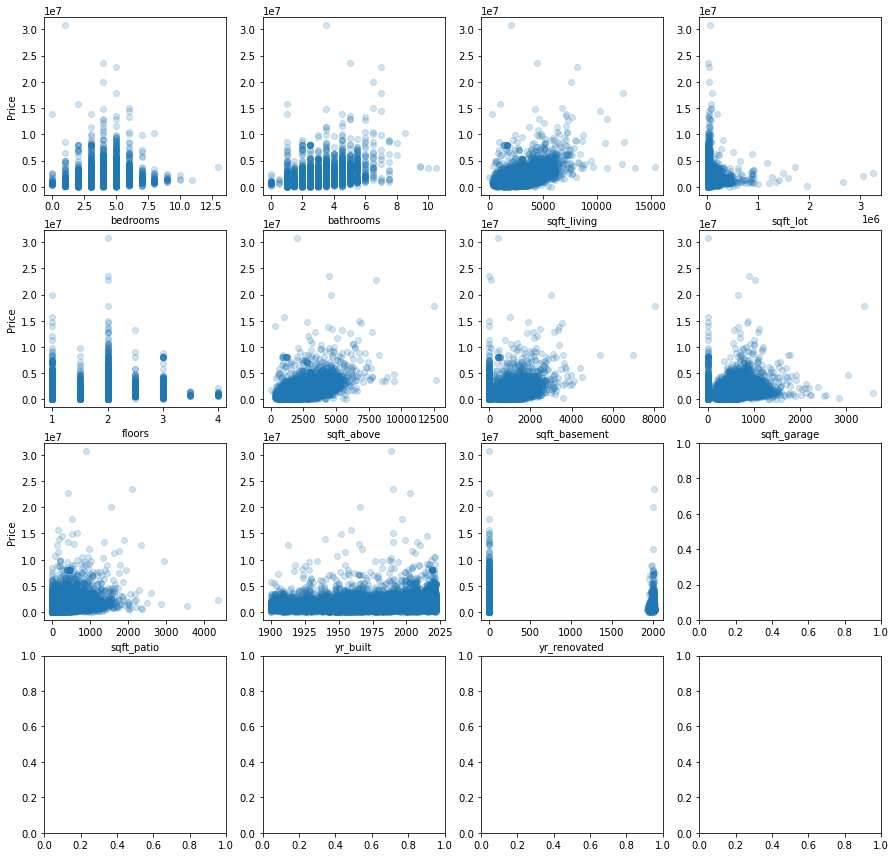

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

for i, column in enumerate(X.columns):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    
    ax.scatter(X[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel('Price')
        
fig.tight_layout
        

***MAYBE FOR BASELINE model calculate all the correlation coefficients and see which ones best align??***

POTENTIAL NUMERIC PREDICTORS
- sqft_living (***TOP***)
- sqft_patio (are there some without patios??)
- sqft_garage
- sqft_lot (looks like some are concentrated around 0...maybe some don't have land)

Question
- How to handle bedrooms/bathrooms/floors etc...are these discrete?
- How should I go about looking at the other discrete options??

Next tier
- yr_built
- yr_renovated (may need to eliminate a lot of data)

In [21]:
#on average looks like sqft_above, sqft basement = sqft_living
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
count,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767
std,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627
min,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000
25%,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000
50%,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000
75%,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000
max,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000


In [22]:
X = df_num['sqft_living']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

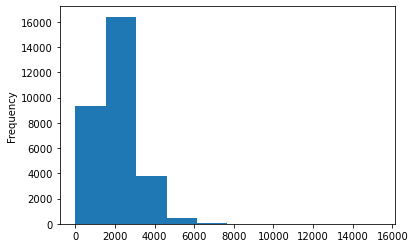

In [23]:
X.plot.hist();

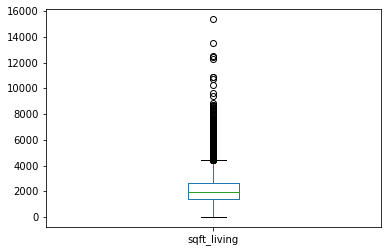

In [24]:
X.plot.box();

In [25]:
X_filt = df_num[['sqft_living', 'price']]
X_filt = X_filt[X_filt['sqft_living'] < 5000]

X_filt.head()

,sqft_living,price
0,1180,675000.0
1,2770,920000.0
2,2880,311000.0
3,2160,775000.0
4,1120,592500.0


In [26]:
y = X_filt['price']
X_filt = X_filt['sqft_living']


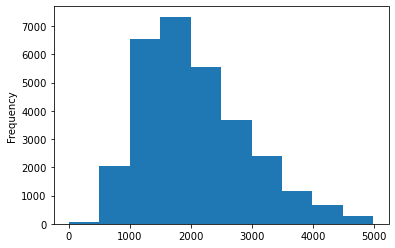

In [27]:
X_filt.plot.hist();

In [28]:
model = sm.OLS(y, sm.add_constant(X_filt))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:24   Log-Likelihood:            -4.3975e+05
No. Observations:               29746   AIC:                         8.795e+05
Df Residuals:                   29744   BIC:                         8.795e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.214e+04   9600.913      8.555      

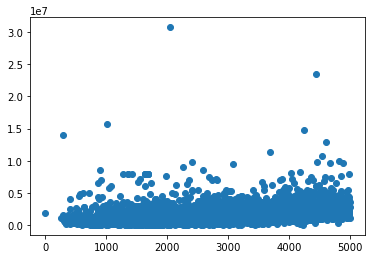

In [29]:
plt.scatter(X_filt, y)

Removing outliers from sqft didn't help baseline model

END PRACTICE

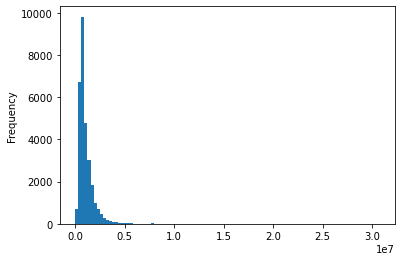

In [30]:
df["price"].plot.hist(bins=100);

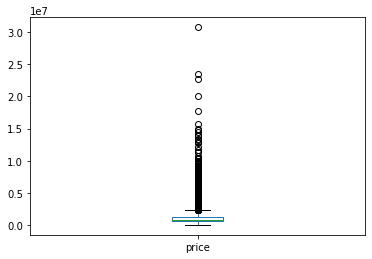

In [31]:
df["price"].plot.box();

In [32]:
# df = df[df["price"]<2500000]

#FILTERING OUTLIERS MADE THE MODELS WORSE

In [33]:
# df["price"].plot.hist(bins=50);

In [34]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [36]:
categoricals = df.select_dtypes("object")

for col in categoricals:
    print(df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
1/16/2022       1
6/9/2022        1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 365, dtype: int64 

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20576
Electric

In [37]:
categoricals = categoricals.drop(labels = ["address", "date"], axis=1)

In [38]:
numerical_rank = df.corr()["price"].sort_values(ascending=False)
numerical_rank

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

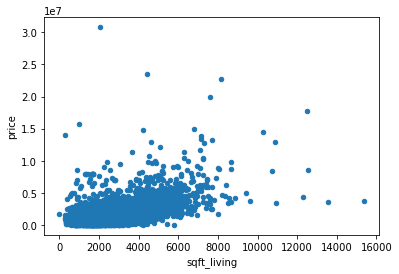

In [39]:
df.plot.scatter("sqft_living", "price");

In [40]:
y = df["price"]
X_baseline = df[["sqft_living"]]

In [41]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:26   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

In [42]:
cat_features = categoricals.columns
cat_features 

Index(['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system'],
      dtype='object')

<bound method Figure.tight_layout of <Figure size 1080x2160 with 9 Axes>>

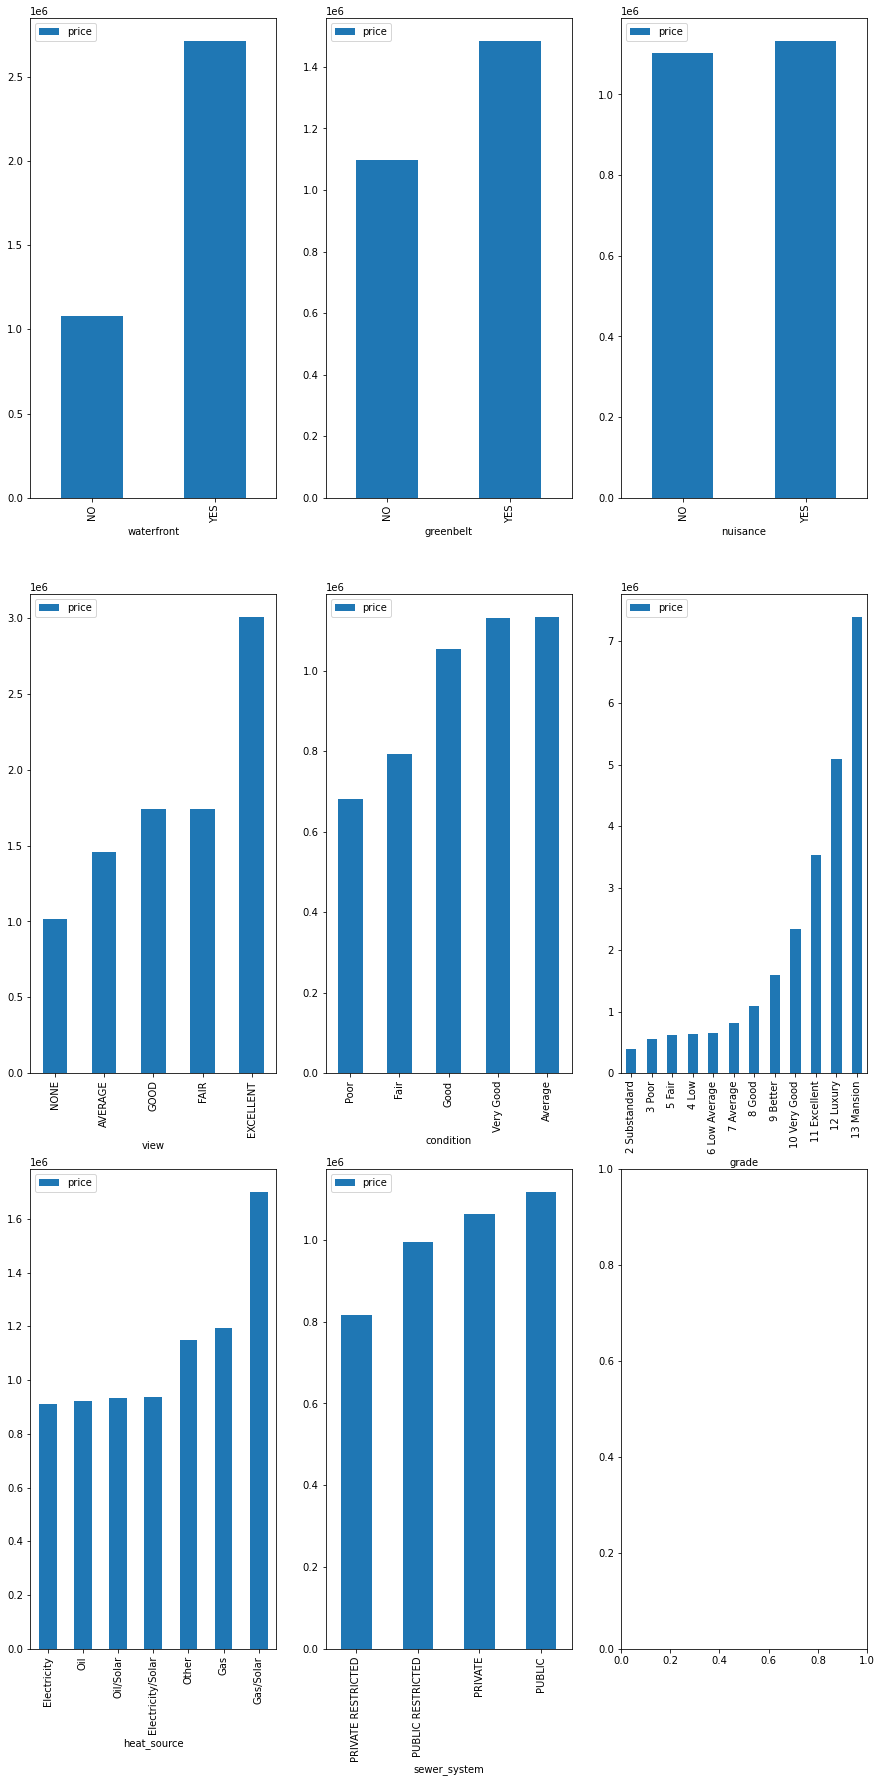

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 30))

for index, feature in enumerate(cat_features):
    row = index//3
    col = index%3
    df.groupby(feature).mean().sort_values(by='price').plot.bar(y="price", ax=ax[row][col])

fig.tight_layout

In [44]:
def label_grade (row):
    if row["grade"] in ["2 Substandard", "3 Poor", "5 Fair", "4 Low", "6 Low Average"]:
        return "2 Substd. - 6 Low Ave."
    if row["grade"] in ["7 Average", "8 Good"]:
        return "7 Ave. - 8 Good"
    if row["grade"] in ["9 Better", "10 Very Good"]:
        return "9 Better - 10 Very Gd."
    if row["grade"] in ["11 Excellent", "12 Luxary", "13 Mansion"]:
        return "11 Ex - 13 Masion"
    
df['grade_group'] = df.apply(lambda row: label_grade(row), axis=1)
    

<AxesSubplot:xlabel='grade_group'>

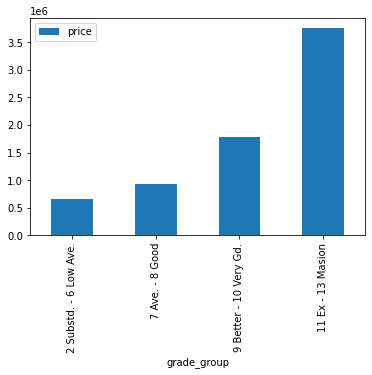

In [45]:
df.groupby("grade_group").mean().sort_values(by='price').plot.bar(y="price")

<AxesSubplot:xlabel='grade_group'>

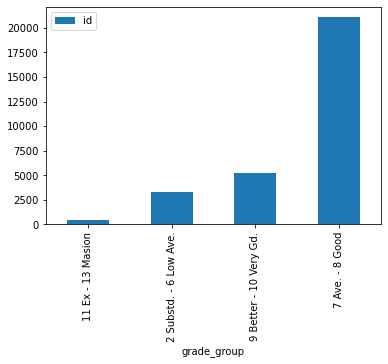

In [46]:
df.groupby("grade_group").count().sort_values(by='price').plot.bar(y='id')

TO DO: Lookup the section of graphing the categories in color...what was that about again??

Potentially group grade into different categories

In [47]:
cat_col_1 = "condition"
X_1 = df[["sqft_living", cat_col_1]]
X_1

,sqft_living,condition
0,1180,Good
1,2770,Average
2,2880,Average
3,2160,Average
4,1120,Average
...,...,...
30150,1910,Good
30151,2020,Average
30152,1620,Average
30153,2570,Average


In [48]:
X_1 = pd.get_dummies(X_1, columns = [cat_col_1])
X_1

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,1,0,0,0,0
...,...,...,...,...,...,...
30150,1910,0,0,1,0,0
30151,2020,1,0,0,0,0
30152,1620,1,0,0,0,0
30153,2570,1,0,0,0,0


In [49]:
X_1.drop("condition_Average", axis=1, inplace=True)

In [50]:
model_1 = sm.OLS(y, sm.add_constant(X_1))
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     3554.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:29   Log-Likelihood:            -4.4845e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30105   BIC:                         8.970e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -9.2e+04   1

In [51]:
cat_col_2 = 'view'
X_2 = df[["sqft_living", cat_col_2]]
X_2 = pd.get_dummies(X_2, columns = [cat_col_2])
X_2

,sqft_living,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,0,0,0,0,1
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,0,0,0,0,1
...,...,...,...,...,...,...
30150,1910,0,0,0,0,1
30151,2020,0,0,1,0,0
30152,1620,0,0,0,0,1
30153,2570,0,0,0,0,1


In [52]:
X_2.drop("view_AVERAGE", axis=1, inplace=True)

model_2 = sm.OLS(y, sm.add_constant(X_2))
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     4290.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:29   Log-Likelihood:            -4.4734e+05
No. Observations:               30111   AIC:                         8.947e+05
Df Residuals:                   30105   BIC:                         8.947e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.48e+05   1.89e+04      7.

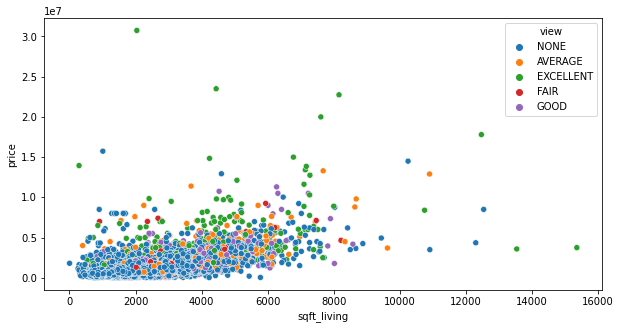

In [53]:
import matplotlib.cm as cm
%matplotlib nbagg
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
# df.plot.scatter(x="sqft_living", y="price", c="view", cmap="plasma", alpha=0.5, ax=ax)

sns.scatterplot(x='sqft_living', y='price', data=df, hue='view');

In [54]:
X_2_interaction = df[["sqft_living", cat_col_2]]
X_2_interaction = pd.get_dummies(X_2_interaction, columns = [cat_col_2])
X_2_interaction

,sqft_living,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,0,0,0,0,1
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,0,0,0,0,1
...,...,...,...,...,...,...
30150,1910,0,0,0,0,1
30151,2020,0,0,1,0,0
30152,1620,0,0,0,0,1
30153,2570,0,0,0,0,1


In [55]:
X_2_interaction['sqft x exc_view'] = X_2_interaction["sqft_living"] * X_2_interaction["view_EXCELLENT"]


In [56]:
X_2_interaction.drop("view_AVERAGE", axis=1, inplace=True)

model_2_interaction = sm.OLS(y, sm.add_constant(X_2_interaction))
results_2_interaction = model_2_interaction.fit()
print(results_2_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3711.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:            -4.4710e+05
No. Observations:               30111   AIC:                         8.942e+05
Df Residuals:                   30104   BIC:                         8.943e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.069e+05   1.89e+04     

In [57]:
cat_col_3 = 'waterfront'
X_3 = df[["sqft_living", cat_col_3]]
X_3 = pd.get_dummies(X_3, columns = [cat_col_3])
X_3

,sqft_living,waterfront_NO,waterfront_YES
0,1180,1,0
1,2770,1,0
2,2880,1,0
3,2160,1,0
4,1120,1,0
...,...,...,...
30150,1910,1,0
30151,2020,1,0
30152,1620,1,0
30153,2570,1,0


In [58]:
X_3.drop("waterfront_NO", axis=1, inplace=True)

model_3 = sm.OLS(y, sm.add_constant(X_3))
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:            -4.4762e+05
No. Observations:               30111   AIC:                         8.952e+05
Df Residuals:                   30108   BIC:                         8.953e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.804e+04   9526.980     -7.

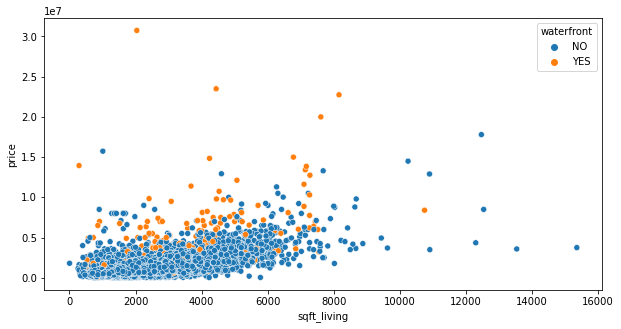

In [59]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x='sqft_living', y='price', data=df, hue='waterfront');

In [60]:
X_3_interaction = df[["sqft_living", cat_col_3]]
X_3_interaction = pd.get_dummies(X_3_interaction, columns = [cat_col_3])
X_3_interaction

,sqft_living,waterfront_NO,waterfront_YES
0,1180,1,0
1,2770,1,0
2,2880,1,0
3,2160,1,0
4,1120,1,0
...,...,...,...
30150,1910,1,0
30151,2020,1,0
30152,1620,1,0
30153,2570,1,0


In [61]:
X_3_interaction['sqft x wf_yes'] = X_3_interaction["sqft_living"] * X_3_interaction["waterfront_YES"]


In [62]:
X_3_interaction.drop("waterfront_NO", axis=1, inplace=True)

model_3_interaction = sm.OLS(y, sm.add_constant(X_3_interaction))
results_3_interaction = model_3_interaction.fit()
print(results_3_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     7459.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:33   Log-Likelihood:            -4.4707e+05
No. Observations:               30111   AIC:                         8.941e+05
Df Residuals:                   30107   BIC:                         8.942e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7236.2275   9530.754     -0.

In [63]:
X_4 = df[["sqft_living", cat_col_3, cat_col_2]]
X_4 = pd.get_dummies(X_4, columns = [cat_col_3, cat_col_2])
X_4

,sqft_living,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,1,0,0,0,0,0,1
1,2770,1,0,1,0,0,0,0
2,2880,1,0,1,0,0,0,0
3,2160,1,0,1,0,0,0,0
4,1120,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
30150,1910,1,0,0,0,0,0,1
30151,2020,1,0,0,0,1,0,0
30152,1620,1,0,0,0,0,0,1
30153,2570,1,0,0,0,0,0,1


In [64]:
X_4.drop(["waterfront_NO", 'view_AVERAGE'], axis=1, inplace=True)

model_4 = sm.OLS(y, sm.add_constant(X_4))
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3691.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:33   Log-Likelihood:            -4.4713e+05
No. Observations:               30111   AIC:                         8.943e+05
Df Residuals:                   30104   BIC:                         8.943e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.034e+05   1.89e+04      5.

In [65]:
cat_col_5 = 'grade_group'
X_5 = df[["sqft_living", cat_col_5]]
X_5 = pd.get_dummies(X_5, columns = [cat_col_5])
X_5

,sqft_living,grade_group_11 Ex - 13 Masion,grade_group_2 Substd. - 6 Low Ave.,grade_group_7 Ave. - 8 Good,grade_group_9 Better - 10 Very Gd.
0,1180,0,0,1,0
1,2770,0,0,1,0
2,2880,0,0,1,0
3,2160,0,0,0,1
4,1120,0,0,1,0
...,...,...,...,...,...
30150,1910,0,0,1,0
30151,2020,0,0,1,0
30152,1620,0,0,1,0
30153,2570,0,0,1,0


In [66]:
X_5.drop("grade_group_2 Substd. - 6 Low Ave.", axis=1, inplace=True)

model_5 = sm.OLS(y, sm.add_constant(X_5))
results_5 = model_5.fit()
print(results_5.summary())

#NOT FOLLOWING WHY 7 - 8 is negative coeff in relation to 2-6...think it's cause qty's vary b/w groups

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     5287.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:33   Log-Likelihood:            -4.4742e+05
No. Observations:               30111   AIC:                         8.949e+05
Df Residuals:                   30106   BIC:                         8.949e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

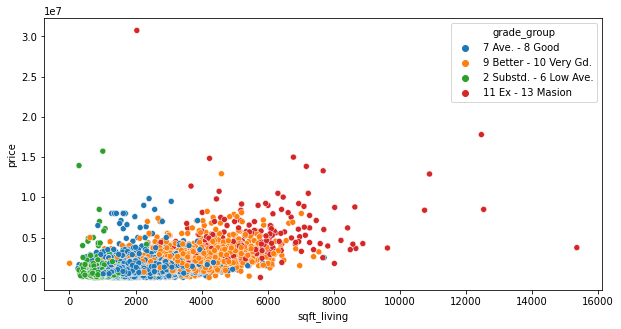

In [67]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x='sqft_living', y='price', data=df, hue='grade_group');

In [68]:
X_6 = df[["sqft_living", cat_col_5, cat_col_2]]
X_6 = pd.get_dummies(X_6, columns = [cat_col_5, cat_col_2])
X_6

,sqft_living,grade_group_11 Ex - 13 Masion,grade_group_2 Substd. - 6 Low Ave.,grade_group_7 Ave. - 8 Good,grade_group_9 Better - 10 Very Gd.,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,1180,0,0,1,0,0,0,0,0,1
1,2770,0,0,1,0,1,0,0,0,0
2,2880,0,0,1,0,1,0,0,0,0
3,2160,0,0,0,1,1,0,0,0,0
4,1120,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
30150,1910,0,0,1,0,0,0,0,0,1
30151,2020,0,0,1,0,0,0,1,0,0
30152,1620,0,0,1,0,0,0,0,0,1
30153,2570,0,0,1,0,0,0,0,0,1


In [69]:
X_6.drop(["view_AVERAGE", 'grade_group_2 Substd. - 6 Low Ave.'], axis=1, inplace=True)

model_6 = sm.OLS(y, sm.add_constant(X_6))
results_6 = model_6.fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     3091.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:35   Log-Likelihood:            -4.4641e+05
No. Observations:               30111   AIC:                         8.928e+05
Df Residuals:                   30102   BIC:                         8.929e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

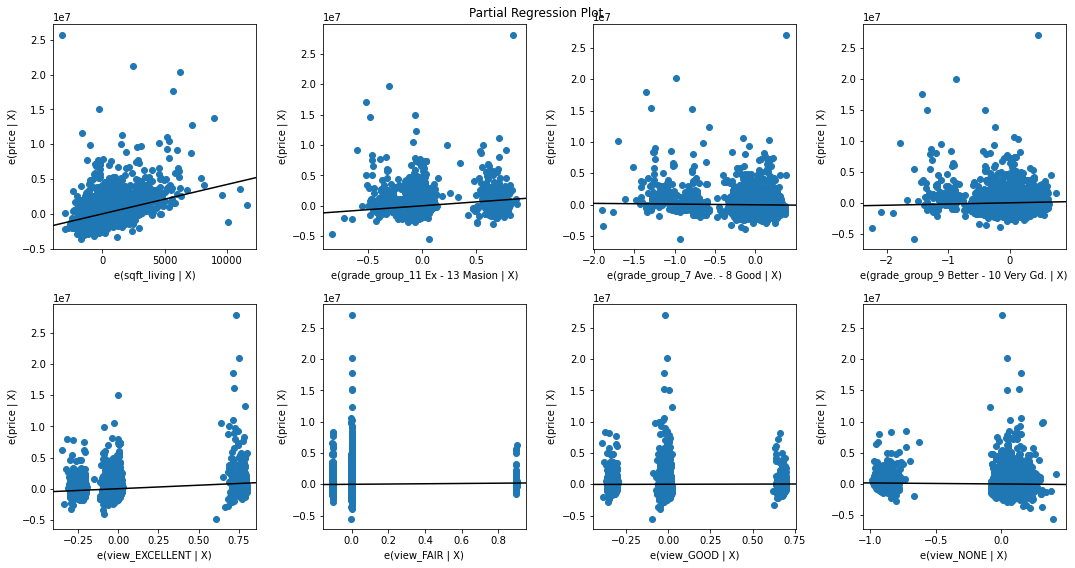

In [70]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results_6,
    exog_idx=list(X_6.columns.values),
    grid=(2,4),
    fig=fig)
plt.show()

In [71]:
X_7 = df[["sqft_living", cat_col_5, cat_col_2, cat_col_3]]
X_7 = pd.get_dummies(X_7, columns = [cat_col_5, cat_col_2, cat_col_3])
X_7

,sqft_living,grade_group_11 Ex - 13 Masion,grade_group_2 Substd. - 6 Low Ave.,grade_group_7 Ave. - 8 Good,grade_group_9 Better - 10 Very Gd.,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_YES
0,1180,0,0,1,0,0,0,0,0,1,1,0
1,2770,0,0,1,0,1,0,0,0,0,1,0
2,2880,0,0,1,0,1,0,0,0,0,1,0
3,2160,0,0,0,1,1,0,0,0,0,1,0
4,1120,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1910,0,0,1,0,0,0,0,0,1,1,0
30151,2020,0,0,1,0,0,0,1,0,0,1,0
30152,1620,0,0,1,0,0,0,0,0,1,1,0
30153,2570,0,0,1,0,0,0,0,0,1,1,0


In [72]:
X_7.drop(["view_AVERAGE", 'grade_group_2 Substd. - 6 Low Ave.', "waterfront_NO"], axis=1, inplace=True)

model_7 = sm.OLS(y, sm.add_constant(X_7))
results_7 = model_7.fit()
print(results_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     2832.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:37   Log-Likelihood:            -4.4620e+05
No. Observations:               30111   AIC:                         8.924e+05
Df Residuals:                   30101   BIC:                         8.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [73]:
X_7 = df[["sqft_living", cat_col_5, cat_col_2, cat_col_3]]
X_7 = pd.get_dummies(X_7, columns = [cat_col_5, cat_col_2, cat_col_3])
X_7

,sqft_living,grade_group_11 Ex - 13 Masion,grade_group_2 Substd. - 6 Low Ave.,grade_group_7 Ave. - 8 Good,grade_group_9 Better - 10 Very Gd.,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_YES
0,1180,0,0,1,0,0,0,0,0,1,1,0
1,2770,0,0,1,0,1,0,0,0,0,1,0
2,2880,0,0,1,0,1,0,0,0,0,1,0
3,2160,0,0,0,1,1,0,0,0,0,1,0
4,1120,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1910,0,0,1,0,0,0,0,0,1,1,0
30151,2020,0,0,1,0,0,0,1,0,0,1,0
30152,1620,0,0,1,0,0,0,0,0,1,1,0
30153,2570,0,0,1,0,0,0,0,0,1,1,0


In [74]:
X_7.drop(["view_AVERAGE", 'grade_group_2 Substd. - 6 Low Ave.', "waterfront_NO"], axis=1, inplace=True)

model_7 = sm.OLS(y, sm.add_constant(X_6))
results_7 = model_6.fit()
print(results_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     3091.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:37   Log-Likelihood:            -4.4641e+05
No. Observations:               30111   AIC:                         8.928e+05
Df Residuals:                   30102   BIC:                         8.929e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [75]:
X_8 = df[["sqft_living", cat_col_5, cat_col_2, cat_col_3, cat_col_1]]
X_8 = pd.get_dummies(X_8, columns = [cat_col_5, cat_col_2, cat_col_3, cat_col_1])
X_8

,sqft_living,grade_group_11 Ex - 13 Masion,grade_group_2 Substd. - 6 Low Ave.,grade_group_7 Ave. - 8 Good,grade_group_9 Better - 10 Very Gd.,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
1,2770,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
2,2880,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
3,2160,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
4,1120,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1910,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
30151,2020,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
30152,1620,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
30153,2570,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


In [76]:
X_8.drop(["view_AVERAGE", 'grade_group_2 Substd. - 6 Low Ave.', "waterfront_NO", "condition_Average"], axis=1, inplace=True)

model_8 = sm.OLS(y, sm.add_constant(X_8))
results_8 = model_8.fit()
print(results_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1968.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:37   Log-Likelihood:            -4.4617e+05
No. Observations:               30111   AIC:                         8.924e+05
Df Residuals:                   30097   BIC:                         8.925e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

REVISIT NUMERICAL...LOG, etc.

In [77]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:37   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      

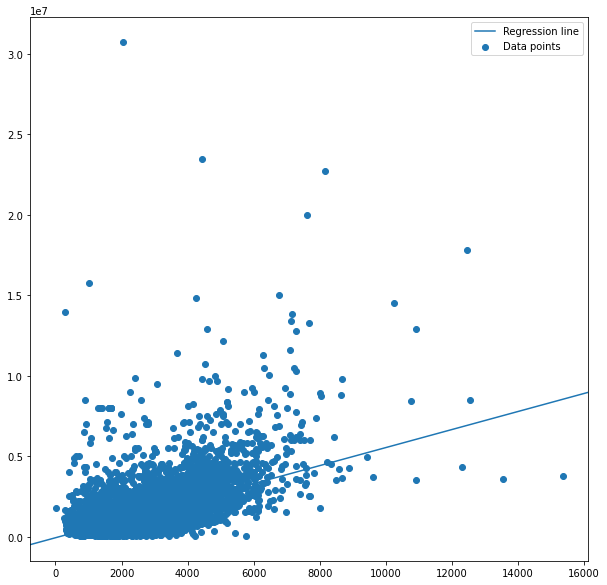

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=X, y=y, label="Data points")
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax)
ax.legend();

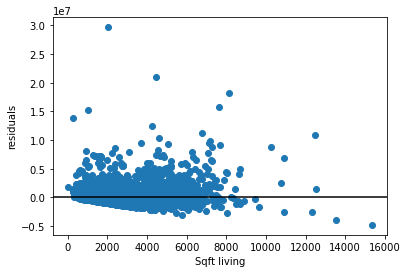

In [79]:
fig, ax = plt.subplots()

ax.scatter(X, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Sqft living")
ax.set_ylabel("residuals");

In [80]:
from statsmodels.stats.diagnostic import het_breuschpagan


het_breuschpagan(baseline_results.resid, sm.add_constant(X))

(339.2322674417345,
 9.377123589060504e-76,
 343.07483627293107,
 3.621798799227653e-76)

In [81]:
numerical_rank

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [82]:
X_sqft_br = df[["sqft_living", "bedrooms"]]
model_sqft_br = sm.OLS(y, sm.add_constant(X_sqft_br))
results_sqft_br = model_sqft_br.fit()

print(results_sqft_br.summary())

#I actually think bedroom should be categorical

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     9497.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:38   Log-Likelihood:            -4.4807e+05
No. Observations:               30111   AIC:                         8.961e+05
Df Residuals:                   30108   BIC:                         8.962e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.378e+05   1.47e+04     16.203      

<AxesSubplot:ylabel='Frequency'>

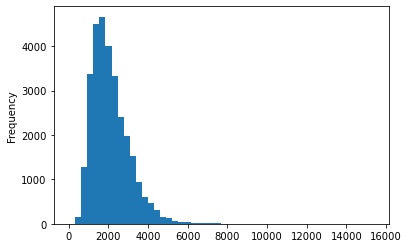

In [83]:
df['sqft_living'].plot.hist(bins=50)

In [84]:
X_sqft_log = X_baseline.copy()
X_sqft_log['log(sqft_living)'] = np.log(X_sqft_log['sqft_living'])
X_sqft_log

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


In [85]:
X_sqft_log

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


In [86]:
y

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
30154     500000.0
Name: price, Length: 30111, dtype: float64

In [87]:
X_sqft_log.drop('sqft_living', axis=1, inplace=True)

model_sqft_log = sm.OLS(y, sm.add_constant(X_sqft_log))
results_sqft_log = model_sqft_log.fit()

print(results_sqft_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:39   Log-Likelihood:            -4.5079e+05
No. Observations:               30111   AIC:                         9.016e+05
Df Residuals:                   30109   BIC:                         9.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.781e+06   7.57e+04  

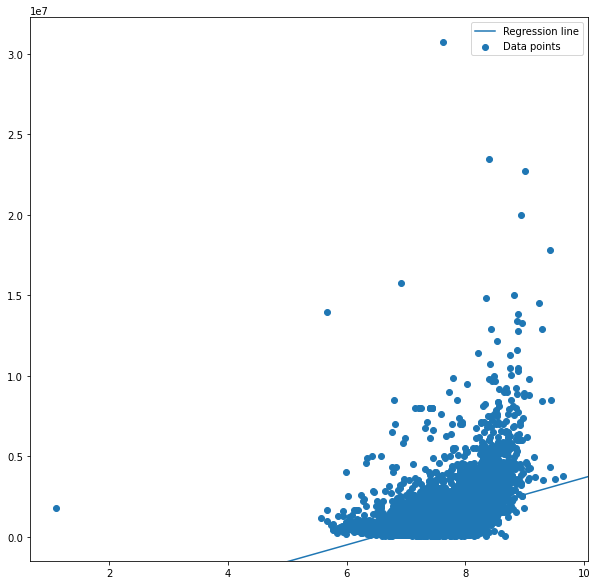

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=X_sqft_log, y=y, label="Data points")
sm.graphics.abline_plot(model_results=results_sqft_log, label="Regression line", ax=ax)
ax.legend();

In [89]:
y_log = np.log(y)
y_log.name = 'log(price)'
y_log

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: log(price), Length: 30111, dtype: float64

In [90]:
model_price_log = sm.OLS(y_log, sm.add_constant(X))
results_price_log = model_price_log.fit()

print(results_price_log.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:39   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      

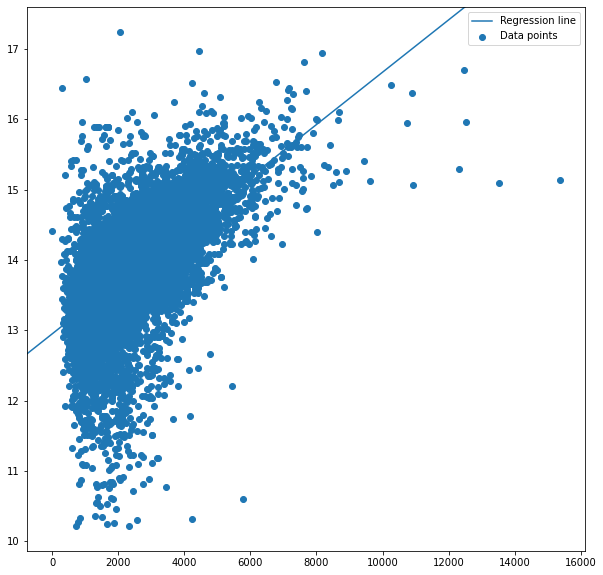

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=X, y=y_log, label="Data points")
sm.graphics.abline_plot(model_results=results_price_log, label="Regression line", ax=ax)
ax.legend();

In [92]:
X

0        1180
1        2770
2        2880
3        2160
4        1120
         ... 
30150    1910
30151    2020
30152    1620
30153    2570
30154    1200
Name: sqft_living, Length: 30111, dtype: int64

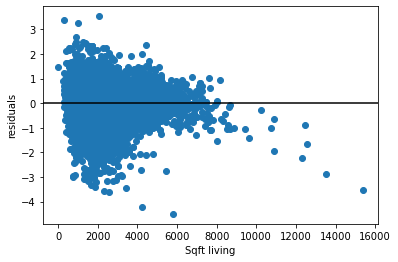

In [93]:
fig, ax = plt.subplots()

ax.scatter(X, results_price_log.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Sqft living")
ax.set_ylabel("residuals");

In [94]:
het_breuschpagan(results_price_log.resid, sm.add_constant(df['sqft_living']))

(104.96907099833632,
 1.2405722790098237e-24,
 105.3292841751419,
 1.135900821248097e-24)

In [95]:
model_sqft_price_log = sm.OLS(y_log, sm.add_constant(X_sqft_log))
results_sqft_price_log = model_sqft_price_log.fit()

print(results_sqft_price_log.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 1.617e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:25:41   Log-Likelihood:                -19957.
No. Observations:               30111   AIC:                         3.992e+04
Df Residuals:                   30109   BIC:                         3.994e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8615      0.046  

Lat/Long check

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [97]:
df[['lat', 'long']].describe()

,lat,long
count,30111.000000,30111.000000
mean,47.328482,-121.318872
std,1.433309,5.724073
min,21.274240,-157.791480
25%,47.405348,-122.326075
50%,47.551440,-122.225790
75%,47.669917,-122.116394
max,64.824070,-70.074340


In [98]:
df['lat'].head()

0    47.461975
1    47.711525
2    47.502045
3    47.566110
4    47.532470
Name: lat, dtype: float64

In [99]:
df['lat']


0        47.461975
1        47.711525
2        47.502045
3        47.566110
4        47.532470
           ...    
30150    47.664740
30151    47.565610
30152    47.610395
30153    47.449490
30154    47.435840
Name: lat, Length: 30111, dtype: float64

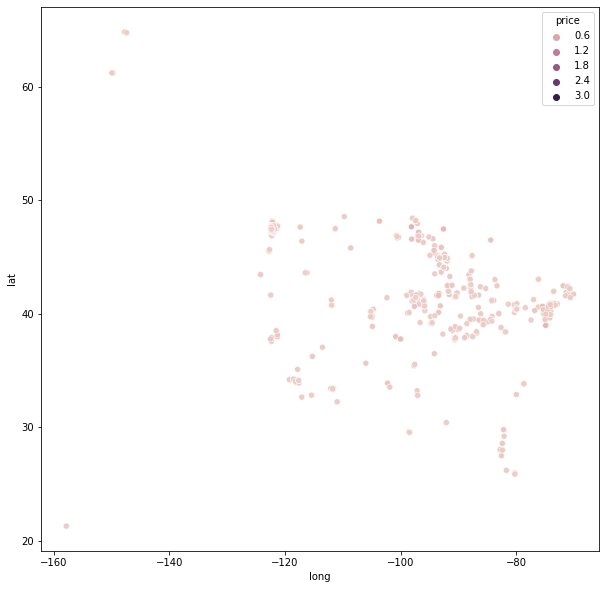

In [100]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x='long', y='lat', data=df, hue='price');



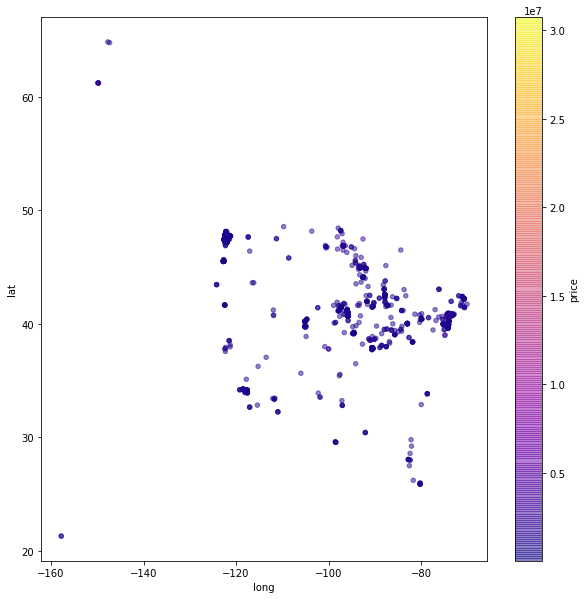

In [101]:
fig, ax = plt.subplots(figsize=(10,10))
df.plot.scatter(x="long", y="lat", c="price", cmap="plasma", alpha=0.5, ax=ax);


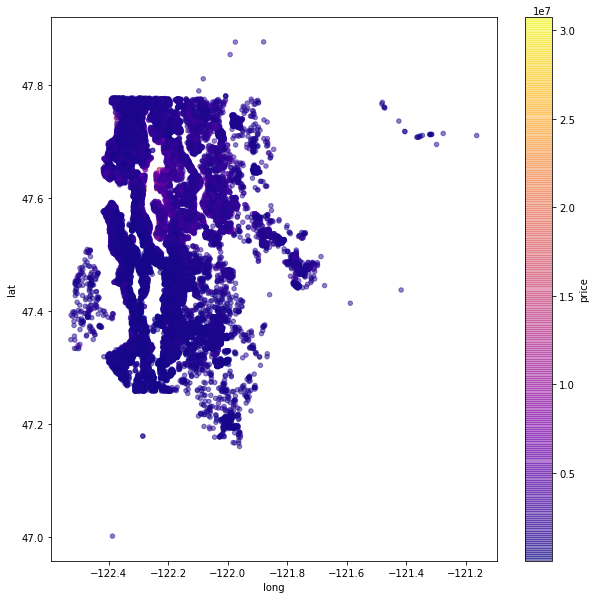

In [102]:
df_zoom = df[(df['lat'] > 47) & (df['lat'] < 48) & (df['long'] > -130) & (df['long'] < -120)]

fig, ax = plt.subplots(figsize=(10,10))
df_zoom.plot.scatter(x="long", y="lat", c="price", cmap="plasma", alpha=0.5, ax=ax);


<AxesSubplot:xlabel='long', ylabel='price'>

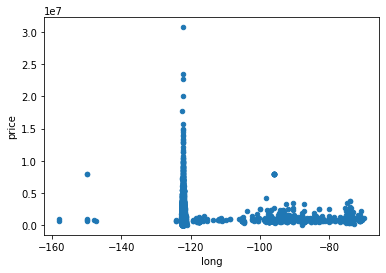

In [103]:
df.plot.scatter(y='price', x='long')

In [104]:
X_loc = df[['lat', 'long']]

In [105]:
model_loc = sm.OLS(y, sm.add_constant(X_loc))
results_loc = model_loc.fit()

print(results_loc.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     85.11
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.38e-37
Time:                        16:25:45   Log-Likelihood:            -4.5535e+05
No. Observations:               30111   AIC:                         9.107e+05
Df Residuals:                   30108   BIC:                         9.107e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.851e+05   1.73e+05     -5.693      0.0

In [106]:
# url = "https://api.mapbox.com/geocoding/v5/mapbox.places/-122.1,47.37.json?access_token=pk.eyJ1IjoicHBhcmtpbnNvbiIsImEiOiJjbGJ6cDR3eW8xMndtM3BwajU5ZGIwbjd3In0.krj0bzOrWhxQiEHZ2w5-IQ"
# url = "https://api.mapbox.com/geocoding/v5/mapbox.places/-122.32940,47.664740.json?types=neighborhood&access_token=pk.eyJ1IjoicHBhcmtpbnNvbiIsImEiOiJjbGJ6cDR3eW8xMndtM3BwajU5ZGIwbjd3In0.krj0bzOrWhxQiEHZ2w5-IQ"
# response = requests.get(url)

In [107]:
# response

In [108]:
# response.json()

In [109]:
# response.json()['features'][0]['text']

In [110]:
# response.json()['features'][0]['text']

In [111]:
# df.head()

In [112]:
pd.set_option('display.max_colwidth', None)
df.address

0             2102 Southeast 21st Court, Renton, Washington 98055, United States
1         11231 Greenwood Avenue North, Seattle, Washington 98133, United States
2              8504 South 113th Street, Seattle, Washington 98178, United States
3            4079 Letitia Avenue South, Seattle, Washington 98118, United States
4          2193 Northwest Talus Drive, Issaquah, Washington 98027, United States
                                          ...                                   
30150        4673 Eastern Avenue North, Seattle, Washington 98103, United States
30151       4131 44th Avenue Southwest, Seattle, Washington 98116, United States
30152    910 Martin Luther King Jr Way, Seattle, Washington 98122, United States
30153      17127 114th Avenue Southeast, Renton, Washington 98055, United States
30154            18615 7th Avenue South, Burien, Washington 98148, United States
Name: address, Length: 30111, dtype: object

In [113]:
df[['Street', 'City', 'State_Zip', 'Country', 'Extra_1', 'Extra_2']] = df['address'].str.split(',', expand = True)

In [114]:
print(df['State_Zip'])

0         Washington 98055
1         Washington 98133
2         Washington 98178
3         Washington 98118
4         Washington 98027
               ...        
30150     Washington 98103
30151     Washington 98116
30152     Washington 98122
30153     Washington 98055
30154     Washington 98148
Name: State_Zip, Length: 30111, dtype: object


In [115]:
# df['State_Zip'] = df['State_Zip'].str.split()

In [116]:
# df['State_Zip']

In [117]:
# df[['State 1', 'State 2', 'Zip']] = df['State_Zip'].str.split(',', expand = True)

In [118]:
# def slice_zip(row):
#     return row['State_Zip'][-5:]

df['zip'] = df.apply(lambda row: row['State_Zip'][-5:], axis=1)

In [119]:
df['zip']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zip, Length: 30111, dtype: object

In [120]:
df.groupby('zip').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,lat,long,grade_group,Street,City,State_Zip,Country,Extra_1,Extra_2
zip,,,,,,,,,,,,,,,,,,,,,
City,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
01541,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,0
02066,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,0,0
02149,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
02341,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stown,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
tland,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,0
tonio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [121]:
pd.set_option('display.max_rows', None)
df['zip'].value_counts() 

98042    992
98038    857
98103    760
98115    760
98117    748
98023    695
98034    689
98058    682
98133    664
98001    623
98092    609
98033    608
98118    600
98059    583
98052    568
98106    543
98031    530
98006    526
98056    520
98155    515
98125    489
98045    466
98107    458
98022    457
98003    440
98122    440
98144    439
98126    437
98146    428
98074    427
98198    425
98075    411
98199    410
98008    397
98053    393
98116    387
98178    383
98168    383
98027    382
98030    377
98002    363
98040    349
98028    349
98166    344
98072    343
98105    330
98004    322
98029    321
98010    314
98112    307
98108    305
98177    301
98136    299
98065    292
98011    261
98077    246
98019    245
98119    241
98055    218
98188    200
98070    191
98032    184
98005    178
98014    156
98007    154
98102    144
98109    129
98057    127
98024    114
98148     94
98047     77
98051     66
98039     59
68410     41
68123     39
monga     38
98354     23

In [122]:
# df = df[df.zip != 'City']

df = df[~df['zip'].str.contains("[a-zA-Z]").fillna(False)]
#INVESTIGATE WHY THIS WORKS

In [123]:
len(df['zip'].value_counts())

386

In [124]:
df.groupby('zip').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,lat,long,grade_group,Street,City,State_Zip,Country,Extra_1,Extra_2
zip,,,,,,,,,,,,,,,,,,,,,
01541,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,0
02066,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,0,0
02149,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
02341,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
02568,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,0,0
02645,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
02790,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
02916,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
07006,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,0,0


In [125]:
#may want adjust required sample size per zip code

df = df[df['zip'].map(df['zip'].value_counts()) > 100]

In [126]:
df_zip_mean = df.groupby('zip', as_index=False).mean()

In [127]:
len(df)

28828

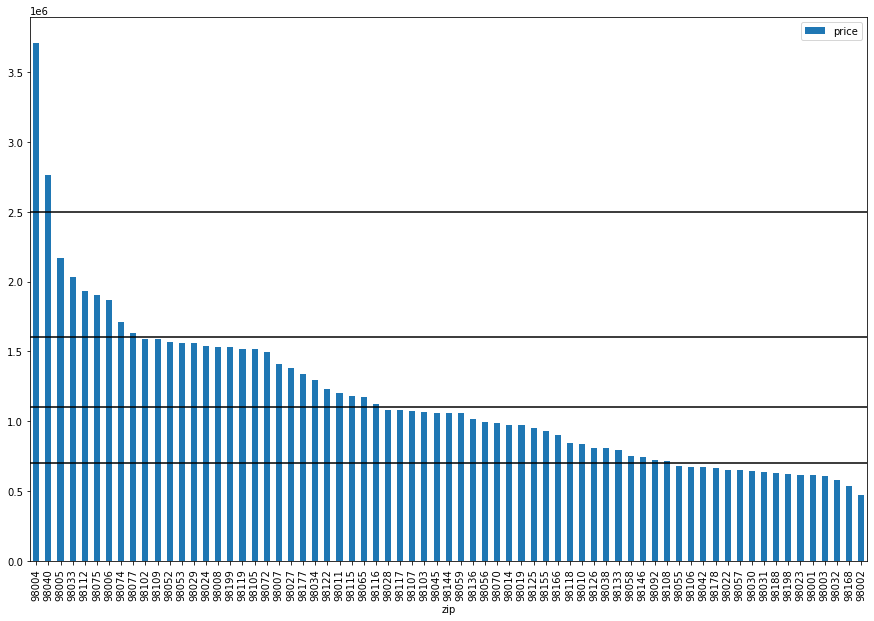

In [128]:
fig, ax = plt.subplots(figsize=(15, 10))

# df.groupby('zip').mean().sort_values('price', ascending=False)['price']
df.groupby('zip').mean().sort_values('price', ascending=False).plot.bar(y='price', ax=ax);
plt.axhline(2500000, color='black')
plt.axhline(1600000, color='black')
plt.axhline(1100000, color='black')
plt.axhline(700000, color='black')

IN FUTURE, ADD CUTOFFS TO VISUALIZATION

In [129]:
df_zip_mean.head()

,zip,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,98001,4.510323e+09,6.166923e+05,3.528090,2.245586,2034.064205,14882.226324,1.471108,1873.264848,253.547352,408.648475,194.914928,1982.995185,44.807384,47.312228,-122.272730
1,98002,4.819624e+09,4.754262e+05,3.228650,1.822314,1543.438017,8360.512397,1.271350,1447.600551,198.966942,252.909091,104.148760,1962.134986,99.391185,47.305168,-122.213713
2,98003,4.559014e+09,6.067547e+05,3.529545,2.226136,1924.588636,11737.277273,1.323864,1656.188636,378.638636,395.306818,203.884091,1975.852273,54.459091,47.317412,-122.313216
3,98004,4.388496e+09,3.706462e+06,4.049689,3.260870,3439.773292,14815.857143,1.527950,2892.102484,766.838509,496.149068,381.593168,1978.431677,198.847826,47.615162,-122.206244
4,98005,4.950089e+09,2.166382e+06,3.949438,2.910112,2889.157303,21473.820225,1.311798,2356.573034,729.775281,492.921348,402.449438,1972.988764,168.426966,47.614878,-122.167561


In [130]:
def label_zip (row):   
    if row['price'] > 2500000:
        return "Tier_1_zip"
    if (row['price'] < 2500000) & (row['price'] > 1600000):
        return "Tier_2_zip"
    if (row['price'] < 1600000) & (row['price'] > 1100000):
        return "Tier_3_zip"
    if (row['price'] < 1100000) & (row['price'] > 700000):
        return "Tier_4_zip"
    if row['price'] < 700000:
        return "Tier_5_zip"
    
df_zip_mean['zip_tier'] = df_zip_mean.apply(lambda row: label_zip(row), axis=1)



In [131]:
df_zip_mean['zip_tier'].value_counts()

Tier_4_zip    24
Tier_3_zip    20
Tier_5_zip    16
Tier_2_zip     7
Tier_1_zip     2
Name: zip_tier, dtype: int64

In [133]:
df_zip_mean = df_zip_mean[['zip', 'zip_tier']]
df_zip_mean

,zip,zip_tier
0,98001,Tier_5_zip
1,98002,Tier_5_zip
2,98003,Tier_5_zip
3,98004,Tier_1_zip
4,98005,Tier_2_zip
5,98006,Tier_2_zip
6,98007,Tier_3_zip
7,98008,Tier_3_zip
8,98010,Tier_4_zip
9,98011,Tier_3_zip


DIDN'T I REMOVE ZIP CODES WITH ENTRIES < 100?...HOW CAN TIER 5 BY THAT LOW

In [135]:
df = df_zip_mean.merge(df, how='inner', 
                                    left_on='zip', 
                                    right_on='zip')

df.head()

,zip,zip_tier,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,address,lat,long,grade_group,Street,City,State_Zip,Country,Extra_1,Extra_2
0,98001,Tier_5_zip,2595650230,4/13/2022,770000.0,4,2.5,1980,13216,2.0,...,"27805 50th Place South, Auburn, Washington 98001, United States",47.35278,-122.271610,7 Ave. - 8 Good,27805 50th Place South,Auburn,Washington 98001,United States,None,None
1,98001,Tier_5_zip,3751602968,9/7/2021,725000.0,3,2.5,2110,23060,2.0,...,"4642 South 358th Street, Auburn, Washington 98001, United States",47.28116,-122.274460,7 Ave. - 8 Good,4642 South 358th Street,Auburn,Washington 98001,United States,None,None
2,98001,Tier_5_zip,6144000040,6/16/2021,471513.0,3,2.5,2060,12679,1.0,...,"3924 South 325th Place, Federal Way, Washington 98001, United States",47.31014,-122.283170,7 Ave. - 8 Good,3924 South 325th Place,Federal Way,Washington 98001,United States,None,None
3,98001,Tier_5_zip,5647900050,9/10/2021,450000.0,3,2.5,1910,8768,1.0,...,"2221 W Street Northwest, Auburn, Washington 98001, United States",47.32775,-122.260100,7 Ave. - 8 Good,2221 W Street Northwest,Auburn,Washington 98001,United States,None,None
4,98001,Tier_5_zip,1312000060,2/15/2022,555000.0,3,1.5,1250,7380,1.0,...,"28807 41st Avenue South, Auburn, Washington 98001, United States",47.34257,-122.282495,7 Ave. - 8 Good,28807 41st Avenue South,Auburn,Washington 98001,United States,None,None


In [136]:
len(df)

28828

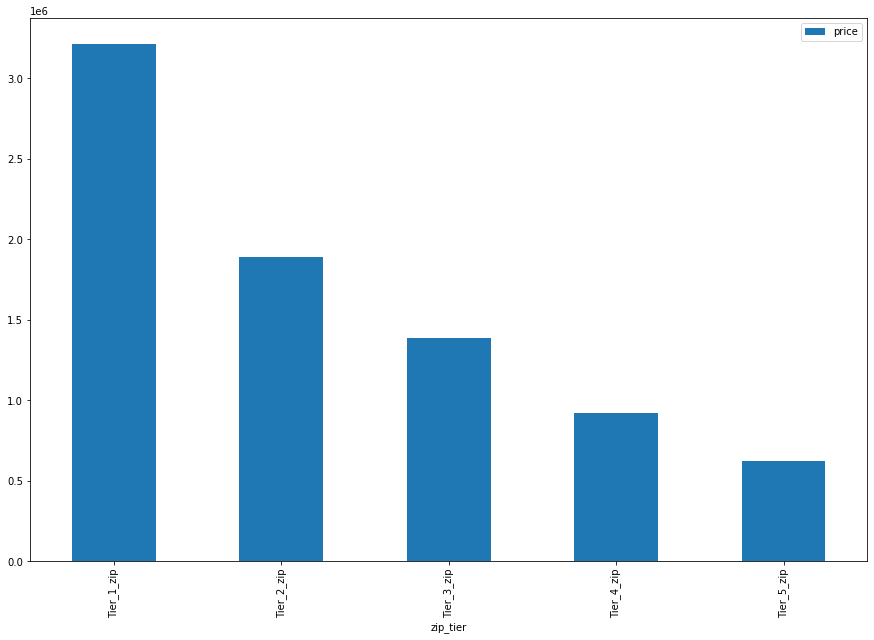

In [138]:
fig, ax = plt.subplots(figsize=(15, 10))

# df.groupby('zip').mean().sort_values('price', ascending=False)['price']
df.groupby('zip_tier').mean().sort_values('price', ascending=False).plot.bar(y='price', ax=ax);


In [142]:
X_9 = df[['sqft_living', 'zip_tier']]
X_9 = pd.get_dummies(X_9, columns = ['zip_tier'])

y = df['price']

X_9.head()

,sqft_living,zip_tier_Tier_1_zip,zip_tier_Tier_2_zip,zip_tier_Tier_3_zip,zip_tier_Tier_4_zip,zip_tier_Tier_5_zip
0,1980,0,0,0,0,1
1,2110,0,0,0,0,1
2,2060,0,0,0,0,1
3,1910,0,0,0,0,1
4,1250,0,0,0,0,1


In [145]:
X_9.drop(['zip_tier_Tier_5_zip'], axis=1, inplace=True)

model_9 = sm.OLS(y, sm.add_constant(X_9))
results_9 = model_9.fit()
print(results_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     6787.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:38:46   Log-Likelihood:            -4.2376e+05
No. Observations:               28828   AIC:                         8.475e+05
Df Residuals:                   28822   BIC:                         8.476e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.859e+05    

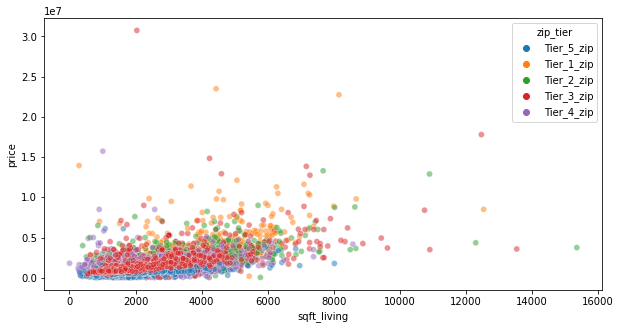

In [148]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x='sqft_living', y='price', data=df, hue='zip_tier', alpha=.5);

In [146]:
X_10 = df[['sqft_living', 'zip_tier', cat_col_5]]
X_10 = pd.get_dummies(X_10, columns = ['zip_tier', cat_col_5])

X_10.drop(['zip_tier_Tier_5_zip', 'grade_group_2 Substd. - 6 Low Ave.'], axis=1, inplace=True)

model_10 = sm.OLS(y, sm.add_constant(X_10))
results_10 = model_10.fit()
print(results_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     4704.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:47:43   Log-Likelihood:            -4.2293e+05
No. Observations:               28828   AIC:                         8.459e+05
Df Residuals:                   28819   BIC:                         8.460e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons